# **Setup**

* https://www.kaggle.com/datasets/sudhanshu2198/oil-spill-detection

In [76]:
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fast')
import seaborn as sns
# plt.set_style('fast')

# **Data Import**

## **Download Data**

In [77]:
os.getcwd()

'c:\\Users\\aksha\\OneDrive\\06 Data Science & Analytics\\Github\\Machine-Learning\\18 Oil Spill Detection'

In [78]:
# os.chdir('Input Data')
# !kaggle datasets download -d sudhanshu2198/oil-spill-detection

# os.chdir('..')

## **Load Data**

In [79]:
df = pd.read_csv('Input Data/Oil_spill.csv')

print(df.shape)
df.sample(10)

(937, 50)


,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
908,176,10,105.80,437.20,54,81000,52.50,7.92,831.0,0.15,...,402.49,0.00,0.00,0.00,0.00,1,2328.92,65.95,6.36,0
233,97,148,1289.87,81.32,30,370000,31.11,9.12,4340.0,0.29,...,1209.34,651.92,279.98,147.71,4.32,0,7005.85,65.54,7.84,0
98,88,92,1455.16,1164.07,48,230000,32.89,6.93,3350.0,0.21,...,1204.16,282.84,117.85,76.70,10.22,0,5658.15,66.10,7.73,0
27,17,2503,1501.49,1141.62,90,6257500,33.76,9.43,29030.0,0.28,...,2800.00,3150.00,2338.39,400.00,1.20,0,5267.92,66.10,7.80,0
195,1,2274,805.86,358.51,60,5685000,24.65,6.74,22260.0,0.27,...,3448.19,1612.45,1209.38,249.81,2.85,0,15749.24,65.61,7.22,1
805,73,22,92.86,386.77,67,178200,54.36,7.20,1768.0,0.13,...,886.40,180.00,100.00,54.08,8.86,0,2600.96,65.88,6.37,0
726,79,19,31.63,621.21,98,153900,70.74,13.27,1339.0,0.19,...,540.00,270.00,165.00,88.49,3.27,0,3455.72,66.16,5.94,0
319,27,179,858.50,1185.32,86,447500,40.25,6.99,5430.0,0.17,...,1852.70,400.00,197.30,92.76,9.39,0,3760.57,66.00,7.00,0
443,11,173,239.32,1410.40,152,243281,24.06,6.45,2213.5,0.27,...,0.00,0.00,0.00,0.00,0.00,0,15072.37,36.17,14.92,0
14,4,2971,1020.91,630.80,59,7427500,32.76,10.48,17380.0,0.32,...,5650.88,1749.29,1245.07,348.70,4.54,0,25579.34,65.78,7.41,1


# **Data Validation**

## **Columns**

In [80]:
df.columns

Index(['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10',
       'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19',
       'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28',
       'f_29', 'f_30', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_36', 'f_37',
       'f_38', 'f_39', 'f_40', 'f_41', 'f_42', 'f_43', 'f_44', 'f_45', 'f_46',
       'f_47', 'f_48', 'f_49', 'target'],
      dtype='object')

In [81]:
# Rename Columns Names
Col_Name_List = df.columns.to_list()
print(Col_Name_List)

New_Col_Name_List = [name.replace('f_','f') for name in Col_Name_List]
print(New_Col_Name_List)

# Assign New Column Names
df.columns = New_Col_Name_List
df.columns

['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28', 'f_29', 'f_30', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_36', 'f_37', 'f_38', 'f_39', 'f_40', 'f_41', 'f_42', 'f_43', 'f_44', 'f_45', 'f_46', 'f_47', 'f_48', 'f_49', 'target']
['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'target']


Index(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11',
       'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21',
       'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31',
       'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41',
       'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'target'],
      dtype='object')

## **Head & Tail**

In [82]:
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f41,f42,f43,f44,f45,f46,f47,f48,f49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [83]:
df.tail()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f41,f42,f43,f44,f45,f46,f47,f48,f49,target
932,200,12,92.42,364.42,135,97200,59.42,10.34,884.0,0.17,...,381.84,254.56,84.85,146.97,4.50,0,2593.50,65.85,6.39,0
933,201,11,98.82,248.64,159,89100,59.64,10.18,831.0,0.17,...,284.60,180.00,150.00,51.96,1.90,0,4361.25,65.70,6.53,0
934,202,14,25.14,428.86,24,113400,60.14,17.94,847.0,0.30,...,402.49,180.00,180.00,0.00,2.24,0,2153.05,65.91,6.12,0
935,203,10,96.00,451.30,68,81000,59.90,15.01,831.0,0.25,...,402.49,180.00,90.00,73.48,4.47,0,2421.43,65.97,6.32,0
936,204,11,7.73,235.73,135,89100,61.82,12.24,831.0,0.20,...,254.56,254.56,127.28,180.00,2.00,0,3782.68,65.65,6.26,0


## **Missing Values**

In [84]:
df.isna().sum()

f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
f8        0
f9        0
f10       0
f11       0
f12       0
f13       0
f14       0
f15       0
f16       0
f17       0
f18       0
f19       0
f20       0
f21       0
f22       0
f23       0
f24       0
f25       0
f26       0
f27       0
f28       0
f29       0
f30       0
f31       0
f32       0
f33       0
f34       0
f35       0
f36       0
f37       0
f38       0
f39       0
f40       0
f41       0
f42       0
f43       0
f44       0
f45       0
f46       0
f47       0
f48       0
f49       0
target    0
dtype: int64

## **Info**

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      937 non-null    int64  
 1   f2      937 non-null    int64  
 2   f3      937 non-null    float64
 3   f4      937 non-null    float64
 4   f5      937 non-null    int64  
 5   f6      937 non-null    int64  
 6   f7      937 non-null    float64
 7   f8      937 non-null    float64
 8   f9      937 non-null    float64
 9   f10     937 non-null    float64
 10  f11     937 non-null    float64
 11  f12     937 non-null    float64
 12  f13     937 non-null    float64
 13  f14     937 non-null    float64
 14  f15     937 non-null    float64
 15  f16     937 non-null    float64
 16  f17     937 non-null    float64
 17  f18     937 non-null    float64
 18  f19     937 non-null    float64
 19  f20     937 non-null    float64
 20  f21     937 non-null    float64
 21  f22     937 non-null    float64
 22  f2

## **Target Imbalance**

target
0    896
1     41
Name: count, dtype: int64


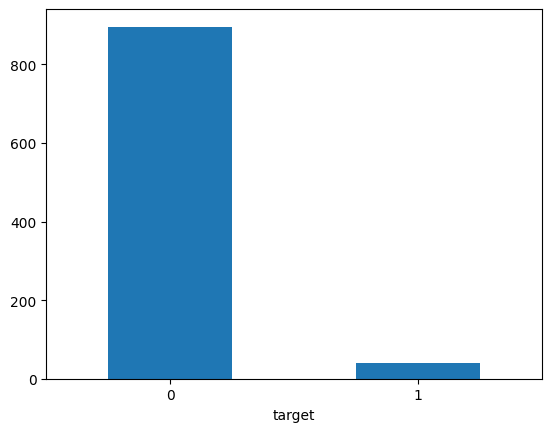

In [86]:
print(df['target'].value_counts())
df['target'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

# **Data Exploration**

## **Correlation Heatmap**

In [87]:
df.columns

Index(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11',
       'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21',
       'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31',
       'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41',
       'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'target'],
      dtype='object')

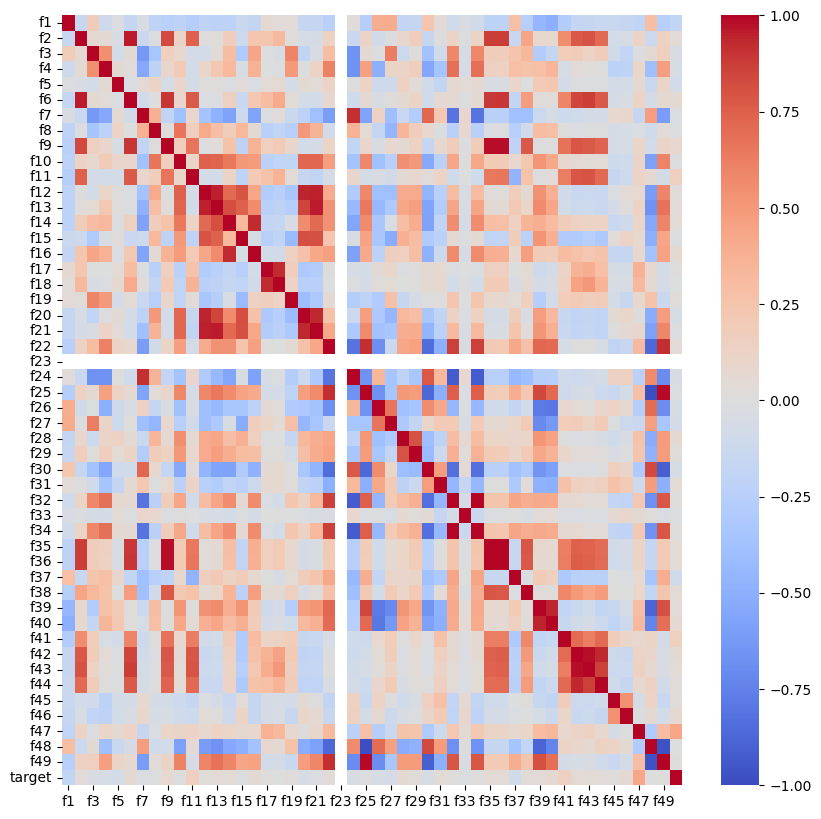

In [88]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(numeric_only=True), annot=False,vmin=-1,vmax=1,cmap='coolwarm')
plt.show()

## **Distribution**  

# **Feature Selection**

## **Outlier Capping/Removal**

In [ ]:
def outlier_removal(df, removal_threshold):
    '''
    Removes outliers from the numeric columns of the dataframe.
    '''
    # Create Copy Of Input Dataframe
    df_copy = df.copy()

    for Feature in df_copy.select_dtypes('number').columns:
        
        if df_copy.shape[0] == 0:
            print('No Data Left In Dataframe!')
            break
        else:          
            Feature_Q1 = df_copy[f'{Feature}'].quantile(.25)
            # print(f'{Feature} Q1: ',Feature_Q1)
            Feature_Q3 = df_copy[f'{Feature}'].quantile(.75)
            # print(f'{Feature} Q3: ',Feature_Q3)
            Feature_IQR = round(Feature_Q3 - Feature_Q1,2)
            # print(f'{Feature} IQR: ',Feature_IQR)
            Feature_Upper_Fence = round(Feature_Q3 + (1.5*Feature_IQR),2)
            # print(f'{Feature} Upper Fence: ',Feature_Upper_Fence)
            Feature_Lower_Fence = round(Feature_Q1 - (1.5*Feature_IQR),2)
            # print(f'{Feature} Lower Fence: ',Feature_Lower_Fence)

            Identified_Outlier_QTY = df_copy[(df_copy[f'{Feature}'] > Feature_Upper_Fence)|(df_copy[f'{Feature}'] < Feature_Lower_Fence)].shape[0]

            if Identified_Outlier_QTY > 0:
                print(f'Found {Identified_Outlier_QTY} Outliers In Feature {Feature}!')

                # Drop Area Outlier
                x_train_Copy = x_train.drop(x_train[(x_train[f'{Feature}'] > Feature_Upper_Fence)|(x_train[f'{Feature}'] < Feature_Lower_Fence)].index,inplace=False)

                if x_train_Copy.shape[0] != 0:
                    # DataFrame Shape Before Outlier Removal
                    print('Dataframe Shape Before Outlier Removal: ',x_train.shape)
                    x_train = x_train_Copy
                    # DataFrame Shape After Outlier Removal
                    print('Dataframe Shape After Outlier Removal: ',x_train.shape,'\n')
                else:
                    x_train.drop(f'{Feature}',axis=1,inplace=True)
                    print(f'Feature {Feature} Removed From Data!','\n')
                    pass

            else:
                print(f'No Outliers Found In Feature {Feature}!','\n')
                pass
        
    return df_copy

## **Target Variable Correlation**

## **Variance Threshold**

In [89]:
df_Feature_Var = df.var().to_frame().reset_index().rename(columns={'index':'Feature', 0:'Variance'})
df_Feature_Var.head()

,Feature,Variance
0,f1,4.221975e+03
1,f2,3.732387e+06
2,f3,3.599587e+05
3,f4,2.733191e+05
4,f5,2.057690e+03


### **Top 10 Features**

In [90]:
df_Feature_Var.sort_values(by='Variance', ascending=False).head(10)

,Feature,Variance
5,f6,1.467772e+13
8,f9,6.670687e+07
46,f47,4.698424e+07
35,f36,2.724190e+07
1,f2,3.732387e+06
40,f41,1.003365e+06
41,f42,5.117852e+05
24,f25,3.751064e+05
2,f3,3.599587e+05
42,f43,2.854831e+05


### **Feature Variance Statistics**

In [91]:
# Feature Variance Statistics
df_Feature_Var['Variance'].describe()

count    5.000000e+01
mean     2.935573e+11
std      2.075742e+12
min      0.000000e+00
25%      5.776253e-02
50%      2.051856e+01
75%      2.208448e+04
max      1.467772e+13
Name: Variance, dtype: float64

In [92]:
df_Feature_Var_Summary_Dict = df_Feature_Var['Variance'].describe().to_dict()
print(df_Feature_Var_Summary_Dict)

{'count': 50.0, 'mean': 293557317218.0454, 'std': 2075742392576.5564, 'min': 0.0, '25%': 0.05776253095668117, '50%': 20.518557875995402, '75%': 22084.481318558337, 'max': 14677718230495.863}


### **Top 50% Variance Features**

In [93]:
df_Feature_Var_Top = df_Feature_Var[df_Feature_Var['Variance']>df_Feature_Var_Summary_Dict['75%']]
df_Feature_Var_Top

,Feature,Variance
1,f2,3.732387e+06
2,f3,3.599587e+05
3,f4,2.733191e+05
5,f6,1.467772e+13
8,f9,6.670687e+07
16,f17,9.261665e+04
17,f18,2.331525e+04
24,f25,3.751064e+05
35,f36,2.724190e+07
40,f41,1.003365e+06


### **Features To Retain**

In [96]:
df = df.loc[:, df_Feature_Var_Top['Feature'].to_list() + ['target']]

print('Dataframe Shape: ',df.shape)
print('Column Names: ',df.columns.to_list(),'\n')

df.head()

Dataframe Shape:  (937, 14)
Column Names:  ['f2', 'f3', 'f4', 'f6', 'f9', 'f17', 'f18', 'f25', 'f36', 'f41', 'f42', 'f43', 'f47', 'target'] 



,f2,f3,f4,f6,f9,f17,f18,f25,f36,f41,f42,f43,f47,target
0,2558,1506.09,456.63,6395000,29780.0,99.59,32.19,132.78,16110,2850.00,1000.00,763.16,33243.19,1
1,22325,79.11,841.03,55812500,61900.0,6058.23,4061.15,132.78,40140,5750.00,11500.00,9593.48,51572.04,0
2,115,1449.85,608.43,287500,3340.0,71.20,16.73,132.78,1530,1400.00,250.00,150.00,31692.84,1
3,1201,1562.53,295.65,3002500,18030.0,120.22,33.47,132.78,10080,6041.52,761.58,453.21,37696.21,1
4,312,950.27,440.86,780000,3350.0,289.19,48.68,132.78,2340,1320.04,710.63,512.54,29038.17,0


## **Pairwise Correlation Check**

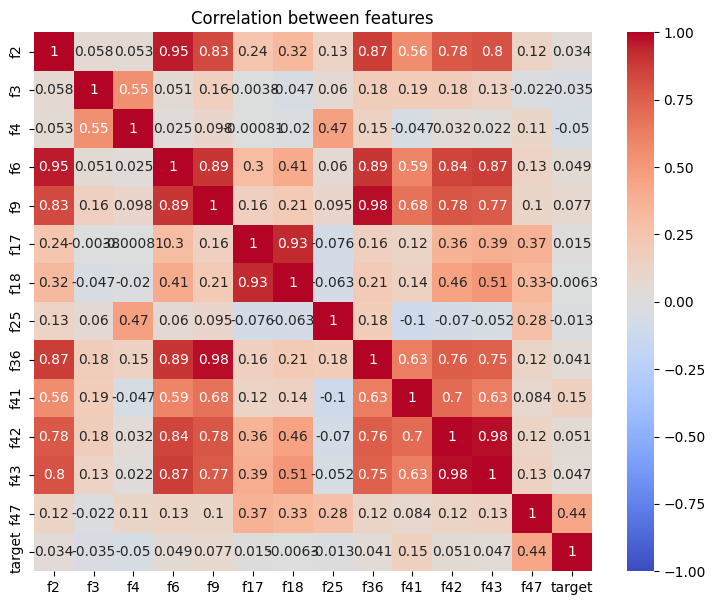

In [104]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(), annot=True,vmin=-1,vmax=1,cmap='coolwarm')
plt.title('Correlation between features')
plt.show()

In [ ]:
for col in df.columns:
    print(col)

## **P-Value Check**